# Importing Library and Dataset

In [2]:
# importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np



In [3]:
#importing dataset

dt = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
# renaming columns for better understanding, in the dataframe
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [6]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:

dt['chest_pain_type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest_pain_type, dtype: int64

In [8]:
# converting numeric values to categorical names for better understanding

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['sex'] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [9]:
# now it is easier to understand

dt['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [10]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [11]:
# first checking the shape of the dataset
dt.shape

(1190, 12)

## Statistical Analysis of Dataset

In [12]:
# statistical analysis of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


## EDA (Categorical Variables)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

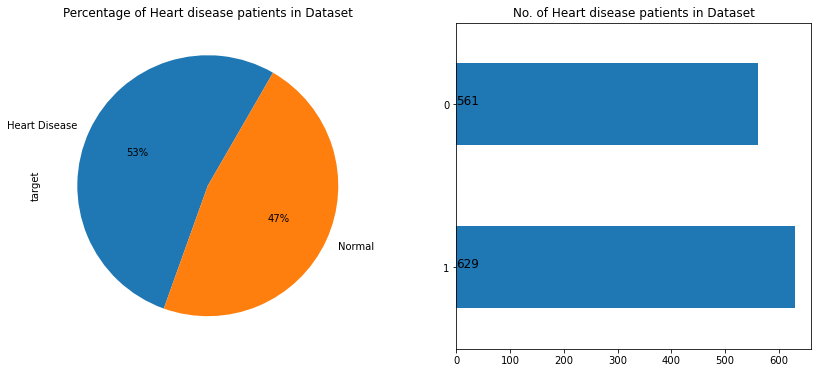

In [14]:
# checking if the dataset is balanced with heart disease patients and normal people

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

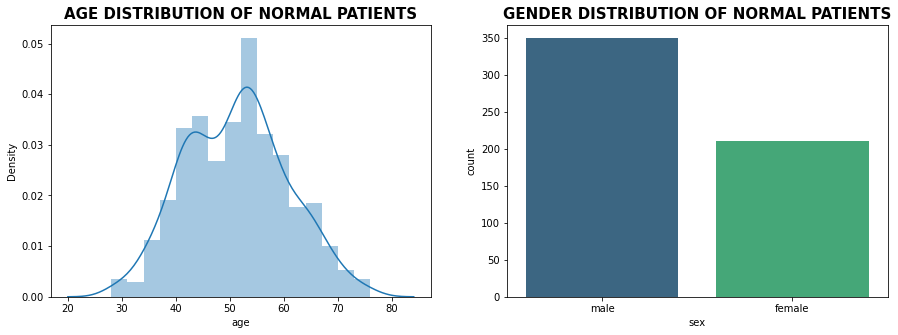

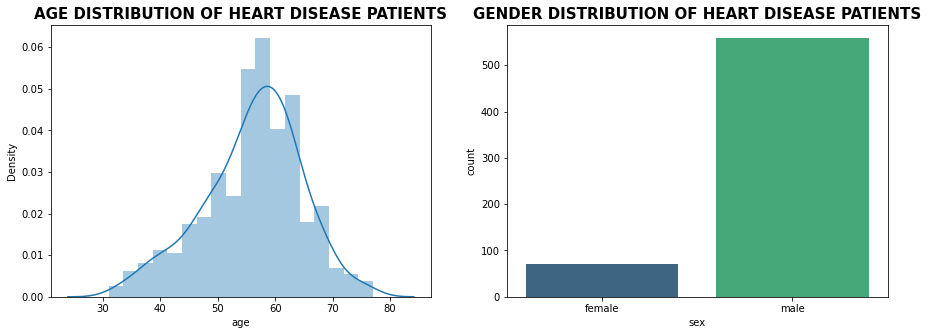

In [15]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients age and sex
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients age and sex

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

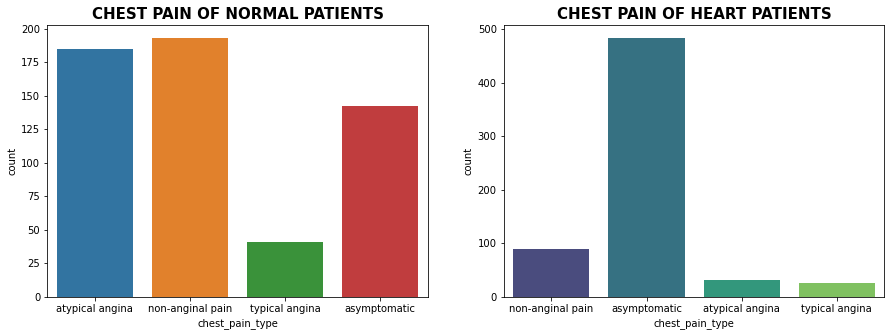

In [16]:
# we will now try to check all the categorical features to extract important features
# Chest Pain


# plotting normal patients 
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

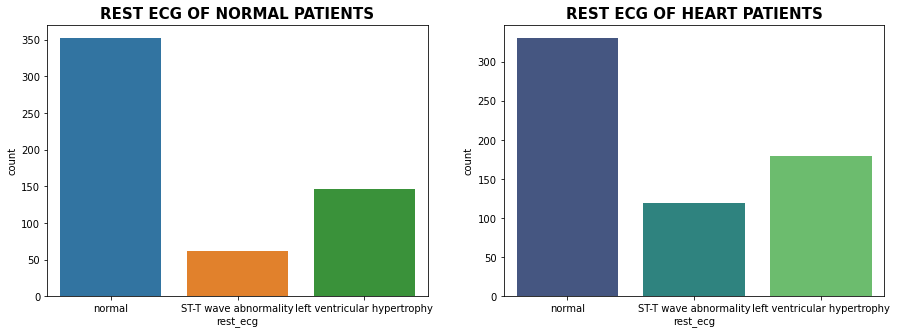

In [17]:
#Resting ECG

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

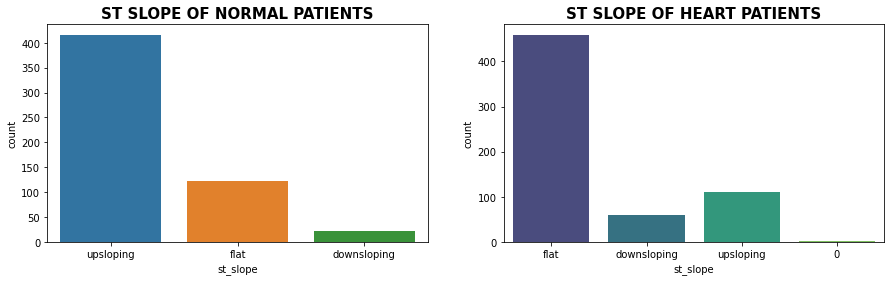

In [18]:
# St- Slope

# plotting normal patients
fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

## EDA (Numerical Variables)

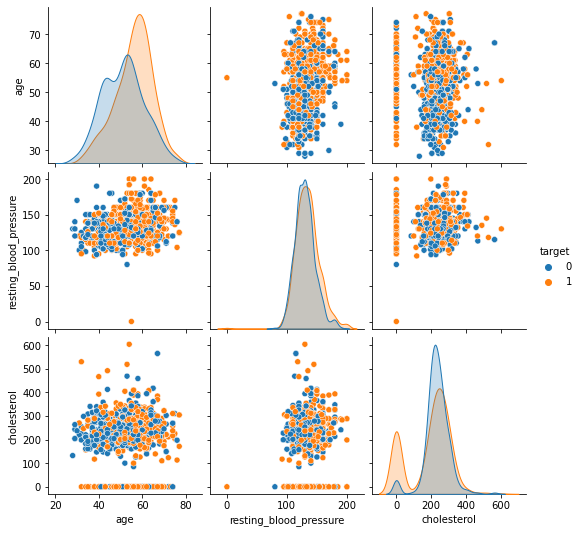

In [19]:

sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

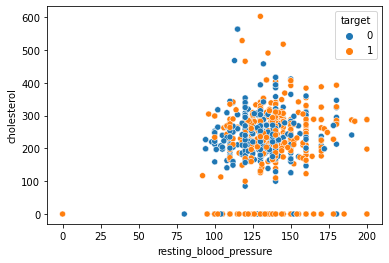

In [20]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

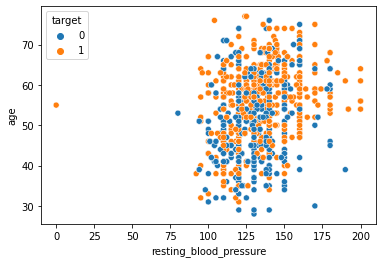

In [21]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

In [22]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [23]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


## Removing outliers (Data Cleaning)

In [24]:
from scipy import stats

# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46672783 0.42732826 0.7756736  1.26503857]
 [0.50460037 1.51658739 0.29951178 0.63775761]
 [1.78743698 0.11730131 0.71648908 1.63613587]
 ...
 [0.35062404 0.11730131 0.782852   0.96964985]
 [0.35062404 0.11730131 0.25287704 1.34344869]
 [1.68053393 0.31840234 0.34883221 1.30424363]]


In [25]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  593,
        618,  734,  761, 1013, 1039, 1075], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [26]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [27]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


## One hot encoding

In [28]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_downsloping,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0,1


In [29]:
dt.shape

(1173, 17)

In [30]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

## Correlation Matrix

<AxesSubplot:title={'center':'Correlation with Heart Disease'}>

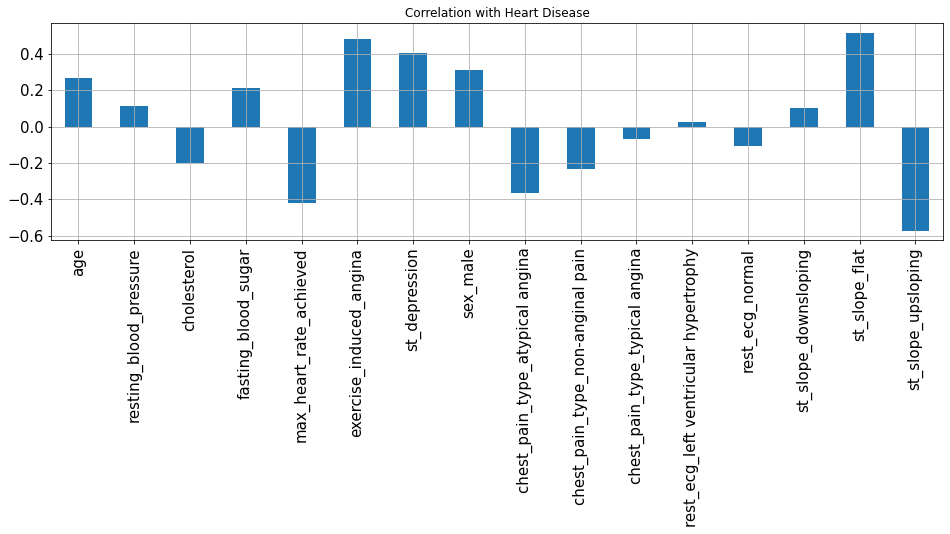

In [31]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Heart Disease", fontsize = 15,
        rot = 90, grid = True)


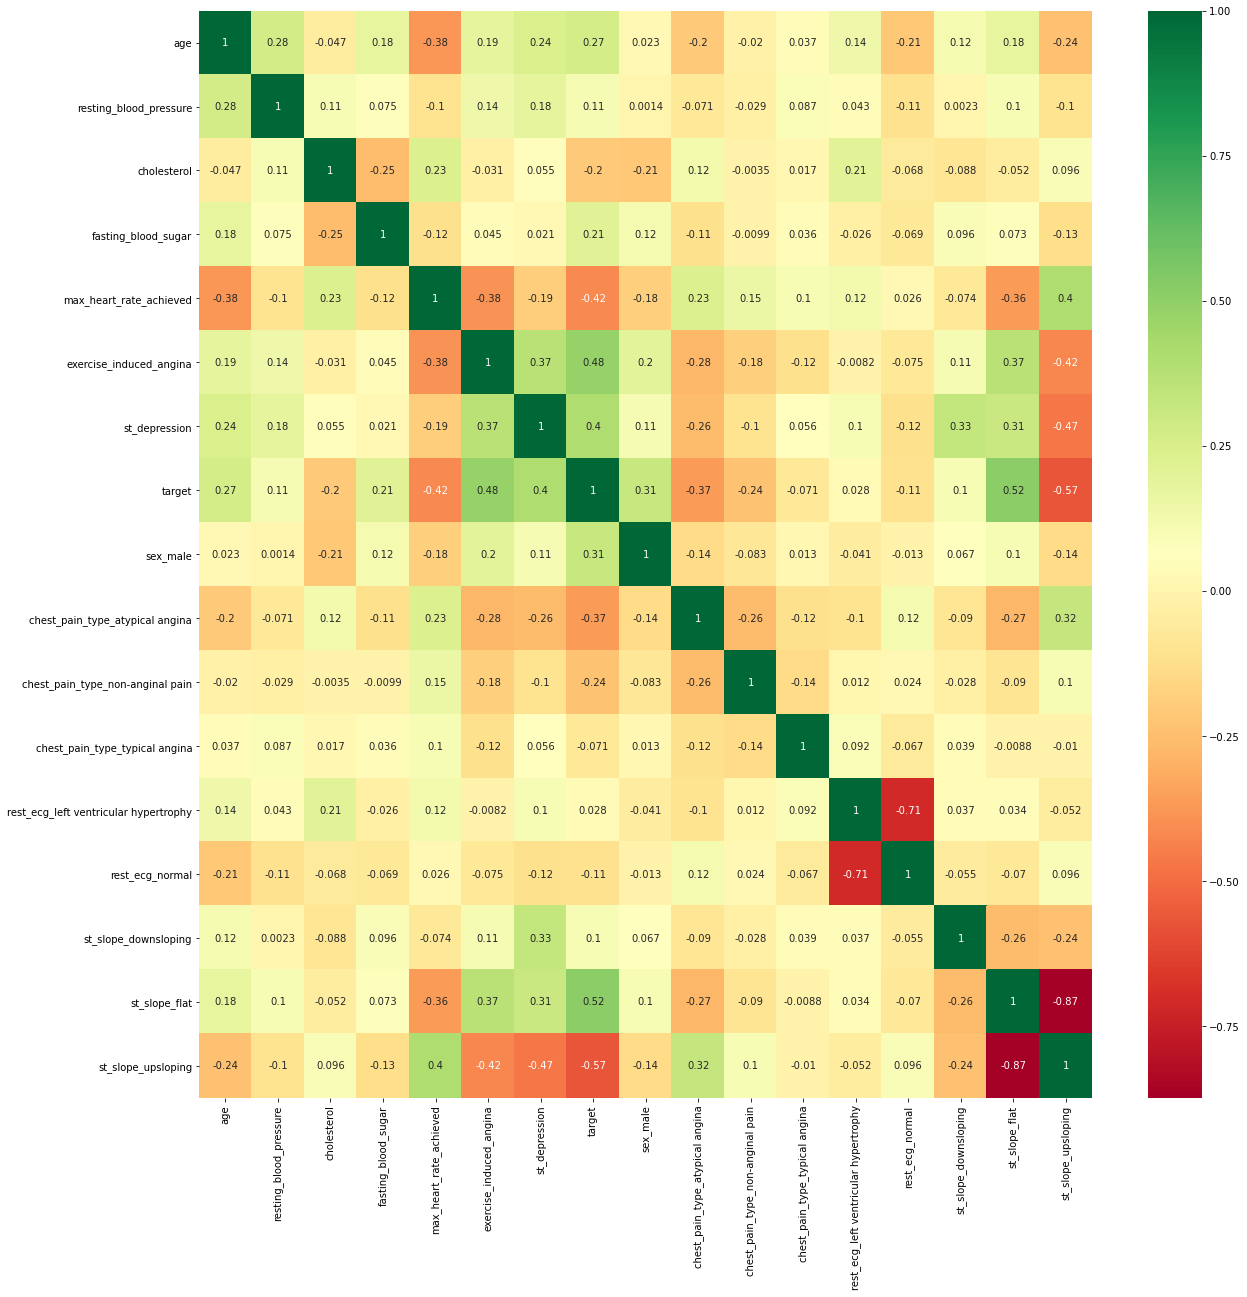

In [32]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dt[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [35]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    492
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [36]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(938, 16)
(938,)
------------Test Set------------------
(235, 16)
(235,)


## Data Normalization

In [37]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_downsloping,st_slope_flat,st_slope_upsloping
1167,0.591837,0.193548,0.682281,0,0.562963,1,0.584416,1,0,0,0,0,1,0,1,0
787,0.836735,0.731183,0.476578,1,0.474074,0,0.207792,1,0,0,1,1,0,0,1,0
208,0.142857,0.193548,0.523422,0,0.540741,0,0.194805,1,1,0,0,0,1,0,1,0
617,0.857143,0.408602,0.655804,0,0.311111,0,0.506494,1,0,0,0,1,0,0,1,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,0,1


In [38]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_downsloping,st_slope_flat,st_slope_upsloping
1098,0.204082,0.301075,0.470468,0,0.851852,1,0.688312,1,0,0,1,0,1,0,1,0
835,0.530612,0.301075,0.525458,0,0.592593,0,0.246753,1,0,1,0,1,0,0,1,0
670,0.714286,0.516129,0.397149,0,0.829630,0,0.194805,0,1,0,0,0,1,0,0,1
502,0.714286,0.408602,0.627291,0,0.525926,1,0.454545,1,0,0,0,0,1,0,1,0
498,0.673469,0.580645,0.490835,0,0.600000,1,0.584416,1,0,0,0,0,1,1,0,0


In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

## Model Building and Evaluation

In [40]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Decision Tree,0.851064,0.87931,0.829268,0.875,0.853556,0.852134,5.144121,0.703554


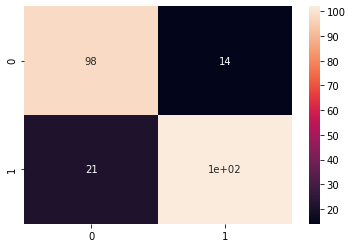

In [41]:
CM=confusion_matrix(y_test,y_pred_decc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_decc)
acc= accuracy_score(y_test, y_pred_decc)
roc=roc_auc_score(y_test, y_pred_decc)
prec = precision_score(y_test, y_pred_decc)
rec = recall_score(y_test, y_pred_decc)
f1 = f1_score(y_test, y_pred_decc)

mathew = matthews_corrcoef(y_test, y_pred_decc)
model_results =pd.DataFrame([['Decision Tree',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [42]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Naive Bayes,0.812766,0.801527,0.853659,0.767857,0.826772,0.810758,6.466923,0.624973


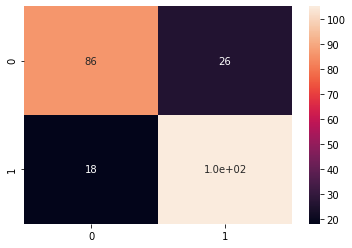

In [43]:
CM=confusion_matrix(y_test,y_pred_gb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_gb)
acc= accuracy_score(y_test, y_pred_gb)
roc=roc_auc_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
rec = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

mathew = matthews_corrcoef(y_test, y_pred_gb)
model_results =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [44]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Support Vector Classifier Linear,0.808511,0.782609,0.878049,0.732143,0.827586,0.805096,6.61391,0.619017


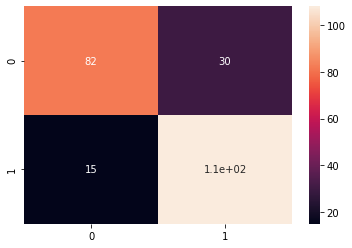

In [45]:
CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_svc)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

mathew = matthews_corrcoef(y_test, y_pred_svc)
model_results =pd.DataFrame([['Support Vector Classifier Linear',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [46]:
svc_rbf = SVC(kernel='rbf',gamma='auto',probability=True)
svc_rbf.fit(X_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Support Vector Classifier RBF,0.808511,0.8,0.845528,0.767857,0.822134,0.806693,6.613897,0.61621


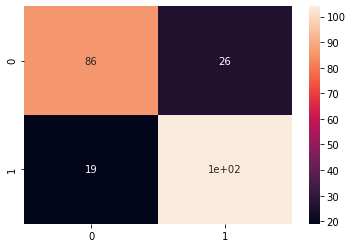

In [47]:
CM=confusion_matrix(y_test,y_pred_svc_rbf)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_svc_rbf)
acc= accuracy_score(y_test, y_pred_svc_rbf)
roc=roc_auc_score(y_test, y_pred_svc_rbf)
prec = precision_score(y_test, y_pred_svc_rbf)
rec = recall_score(y_test, y_pred_svc_rbf)
f1 = f1_score(y_test, y_pred_svc_rbf)

mathew = matthews_corrcoef(y_test, y_pred_svc_rbf)
model_results =pd.DataFrame([['Support Vector Classifier RBF',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [48]:
lg_reg = LogisticRegression(penalty='l2')
lg_reg.fit(X_train,y_train)
y_pred_lgreg = lg_reg.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Logistic Regression,0.808511,0.782609,0.878049,0.732143,0.827586,0.805096,6.61391,0.619017


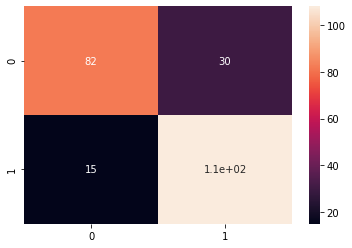

In [49]:
CM=confusion_matrix(y_test,y_pred_lgreg)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_lgreg)
acc= accuracy_score(y_test, y_pred_lgreg)
roc=roc_auc_score(y_test, y_pred_lgreg)
prec = precision_score(y_test, y_pred_lgreg)
rec = recall_score(y_test, y_pred_lgreg)
f1 = f1_score(y_test, y_pred_lgreg)

mathew = matthews_corrcoef(y_test, y_pred_lgreg)
model_results =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [50]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.885106,0.869231,0.918699,0.848214,0.893281,0.883457,3.968343,0.619017


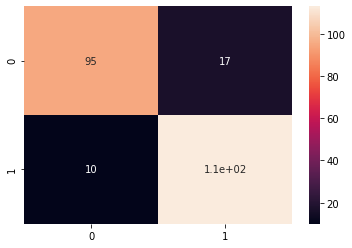

In [53]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_lgreg)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## ROC and AUC

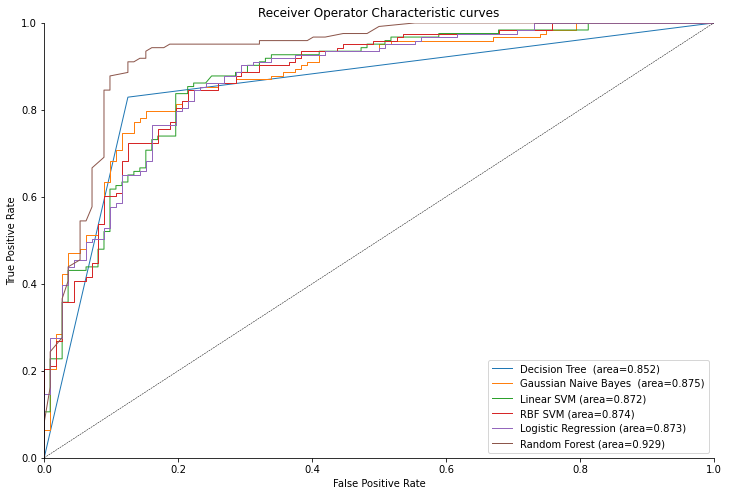

In [54]:

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,decc.predict_proba(X_test),label='Decision Tree ',l='-')
roc_auc_plot(y_test,gb.predict_proba(X_test),label='Gaussian Naive Bayes ',l='-')
roc_auc_plot(y_test,svc.predict_proba(X_test),label='Linear SVM',l='-')
roc_auc_plot(y_test,svc_rbf.predict_proba(X_test),label='RBF SVM',l='-')
roc_auc_plot(y_test,lg_reg.predict_proba(X_test),label='Logistic Regression',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()